In [30]:
%matplotlib inline


# Plot multinomial and One-vs-Rest Logistic Regression


Plot decision surface of multinomial and One-vs-Rest Logistic Regression.
The hyperplanes corresponding to the three One-vs-Rest (OVR) classifiers
are represented by the dashed lines.



Automatically created module for IPython interactive environment
training score : 0.995 (multinomial)
664
[[[664   2]
  [  1 333]]

 [[664   3]
  [  2 331]]

 [[667   0]
  [  2 331]]]
class = 0, color = b
class = 1, color = r
class = 2, color = k
training score : 0.976 (ovr)
656
[[[656  10]
  [  6 328]]

 [[660   7]
  [ 17 316]]

 [[660   7]
  [  1 332]]]
class = 0, color = b
class = 1, color = r
class = 2, color = k


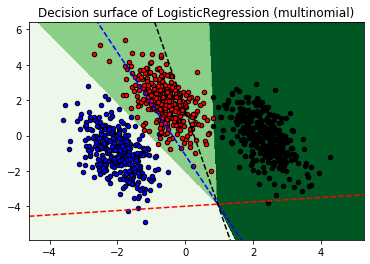

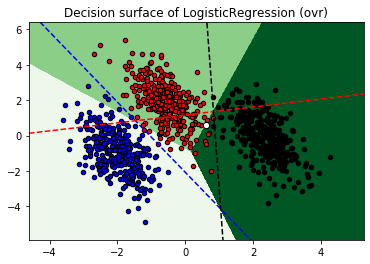

In [71]:
print(__doc__)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import multilabel_confusion_matrix

# make 3-class dataset for classification
centers = [[-5, 0], [0, 1.5], [5, -1]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=40)
transformation = [[0.4, 0.2], [-0.4, 1.2]]
X = np.dot(X, transformation)

for multi_class in ('multinomial', 'ovr'):
    clf = LogisticRegression(solver='sag', max_iter=100, random_state=42,
                             multi_class=multi_class).fit(X, y)

    # print the training scores
    print("training score : %.3f (%s)" % (clf.score(X, y), multi_class))

    # print confusion matrix
    y_predict = clf.predict(X)
    cm = multilabel_confusion_matrix(y, y_predict)
    print(len([(i, j) for i, j in zip(y, y_predict) if i != 0 and j != 0]))
    print(cm)
    
    # create a mesh to plot in
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
#     plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.contourf(xx, yy, Z, cmap='Greens')
    plt.title("Decision surface of LogisticRegression (%s)" % multi_class)
    plt.axis('tight')

    # Plot also the training points
    colors = "brk"
    for claz, color in zip(clf.classes_, colors):
        print(f'class = {claz}, color = {color}')
        idx = np.where(y == claz)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.Paired,
                edgecolor='black', s=20)

    # Plot the three one-against-all classifiers
    xmin, xmax = plt.xlim()
    ymin, ymax = plt.ylim()
    coef = clf.coef_
    intercept = clf.intercept_

    def plot_hyperplane(c, color):
        def line(x0):
            return (-(x0 * coef[c, 0]) - intercept[c]) / coef[c, 1]
        plt.plot([xmin, xmax], [line(xmin), line(xmax)],
                 ls="--", color=color)

    for i, color in zip(clf.classes_, colors):
        plot_hyperplane(i, color)

# plot false negitive         
fn_1 = [(i, j, k) for i, j, k in zip(X, y, y_predict) if j == 1 and k != 1]
idx = 14
plt.scatter(fn_1[idx][0][0], fn_1[idx][0][0], c='w', cmap=plt.cm.Paired, edgecolor='black', s=40)
plt.show()

In [49]:
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

fn_1 = [(i, j, k) for i, j, k in zip(X, y, y_predict) if j == 1 and k != 1]
y_predict_proba =  clf.predict_proba([x for x, _, _ in fn_1])
for i in range(len(fn_1)):
    print(f'{fn_1[i]}\t {y_predict_proba[i]}\t {np.argmax(y_predict_proba[i])}')

(array([0.762, -1.978]), 1, 2)	 [0.089 0.014 0.897]	 2
(array([-0.736, -0.158]), 1, 0)	 [0.673 0.326 0.001]	 0
(array([-0.788, -0.485]), 1, 0)	 [0.856 0.143 0.001]	 0
(array([0.695, 0.127]), 1, 2)	 [0.001 0.296 0.704]	 2
(array([-1.071, 0.246]), 1, 0)	 [0.615 0.385 0.000]	 0
(array([0.277, -0.987]), 1, 2)	 [0.266 0.266 0.468]	 2
(array([0.814, 1.011]), 1, 2)	 [0.000 0.442 0.558]	 2
(array([0.667, 0.090]), 1, 2)	 [0.001 0.307 0.692]	 2
(array([-0.547, -0.364]), 1, 0)	 [0.687 0.309 0.004]	 0
(array([0.571, -0.330]), 1, 2)	 [0.007 0.268 0.725]	 2
(array([-1.250, 0.596]), 1, 0)	 [0.509 0.491 0.000]	 0
(array([-0.486, -0.205]), 1, 0)	 [0.511 0.483 0.007]	 0
(array([-1.219, 0.316]), 1, 0)	 [0.649 0.351 0.000]	 0
(array([-0.122, -0.696]), 1, 0)	 [0.578 0.363 0.059]	 0
(array([0.613, -0.456]), 1, 2)	 [0.007 0.206 0.787]	 2
(array([-0.444, -0.728]), 1, 0)	 [0.836 0.158 0.005]	 0
(array([0.227, -1.691]), 1, 0)	 [0.772 0.047 0.181]	 0
